# Experiments on the usage of find_galaxy script from Cappellari through Francesco D'Eugenio

In [1]:
import pynbody
import numpy as np
import matplotlib.pyplot as plt
from luminosity import luminosity_plot

In [2]:
snap = "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036"
s = pynbody.load(snap)

In [3]:
pynbody.analysis.halo.center(s.s)

In [4]:
s.properties['boxsize'] = pynbody.units.Unit("1 Gpc")

In [5]:
# pynbody.plot.stars.render(s.s, width='8 kpc')

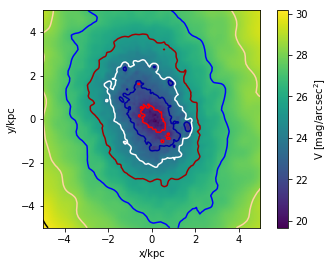

In [6]:
width = 10
resolution=500
fig, ax = plt.subplots(1)
img = luminosity_plot(s, band='v', width=width, resolution=resolution, mag_filter=None, subplot=ax)
cont = ax.contour(img, cmap='flag', extent=(-width/2, width/2, -width/2, width/2))

In [7]:
from find_galaxy import find_galaxy

In [23]:
gal = find_galaxy(img.view(np.ndarray), fraction=1)

 Pixels used: 249988
 Peak Img[j, k]: 234 232
 Mean (j, k): 248.51 249.78
 Theta (deg): 154.7
 Astro PA (deg): 115.3
 Eps: 0.014
 Major axis (pix): 352.3


In [24]:
from matplotlib import patches

In [25]:
a = gal.majoraxis
b = a * np.sqrt(1 - gal.eps**2)

In [26]:
ell = patches.Ellipse(xy=(gal.xmed, gal.ymed), width=a, height=b, angle=gal.theta, alpha=0.3, color='w')

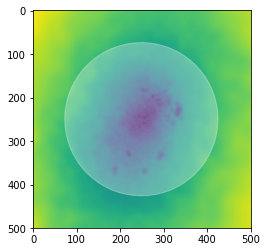

In [27]:
fig, ax = plt.subplots(1)
ax.imshow(img)
ax.add_patch(ell)